# **Multi-Layer Perceptrons and ARIMA Model for Time Series Forecasting** 


**Problem 1a:** We've discussed in class about the perceptron, or 'artificial neuron', the simplest artifical neural unit of processing that enables machines to learn linear mappings between inputs and outputs, as shown below.  Here, we will implement a Multi-Layer Perceptron (MLP), which enables *non-linear* mappings, and will use it to predict the next number in a sequence.

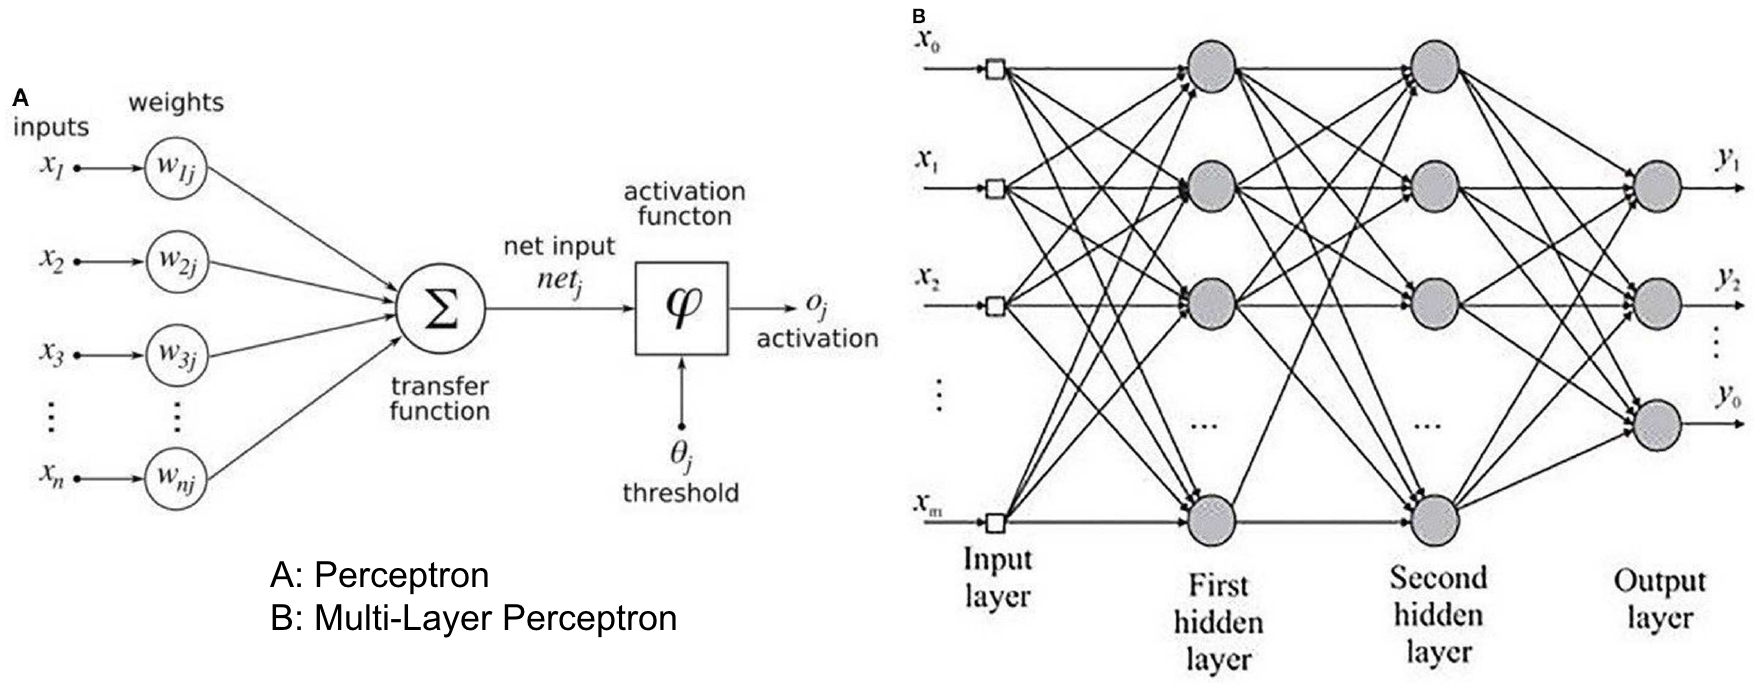

In [ ]:
#Imports
import numpy as np

In [ ]:
# PREPROCESS DATA for input/output: split a univariate sequence into samples
# 3 inputs --> 1 output
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [ ]:
# Define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# summarize the data
for i in range(len(X)):
	print(X[i], y[i])

[10 20 30] 40
[20 30 40] 50
[30 40 50] 60
[40 50 60] 70
[50 60 70] 80
[60 70 80] 90


**YOUR TASK:** Define a model using Keras Sequential API that correctly predicts the output given a new input sequence of 3 numbers, train your model, plot the model training loss, and demonstrate a sample prediction.  Provide comments to explain each line of your model.  What is the impact on the accuracy of your prediction when you have no hidden layers (perceptron) vs. at least 1 hidden layer (MLP)?

In [ ]:
# Imports
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers
from tensorflow.keras.utils import plot_model
from keras.regularizers import l1

In [ ]:
np.shape(X)

(6, 3)

In [ ]:
# Define the Perceptron model
model = keras.models.Sequential()
model.add(keras.layers.Dense(1, activation="relu", kernel_regularizer=l1(0.), input_shape=[3,]))

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, None, 1)           4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


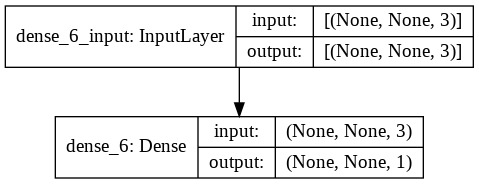

In [ ]:
#Visual of model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
#For a perceptron I chose a linear model 
model.compile(loss="mse", optimizer="rmsprop")

In [ ]:
#Train the model
history = model.fit(X, y, epochs=550)

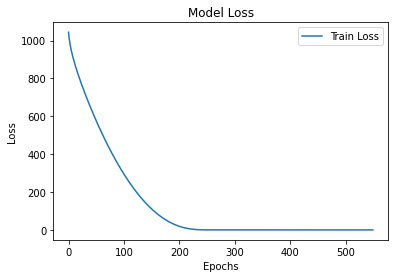

In [ ]:
#Plot the training loss using information from the above model training step
import matplotlib.pyplot as plt

loss = history.history['loss']

plt.plot(history.history['loss'], label='Train Loss')

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc='upper right')
plt.show();

In [ ]:
#Demonstrate Prediction using model.predict
x_input = np.array([70, 80, 90]) # predict the output for this input
x_input = x_input.reshape((1, n_steps))
y_output = model.predict(x_input)
print("X=%s, Predicted=%s" % (x_input, y_output))

X=[[70 80 90]], Predicted=[[100.044655]]


 **Model very accurately predicts data given a large number of epochs.**

In [ ]:
#Define Multi-Layer Perceptron (with at least 1 hidden layer)
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers
from tensorflow.keras.utils import plot_model
from keras.regularizers import l1

model = keras.models.Sequential()
model.add(keras.layers.Dense(8, activation="relu", input_shape=[3,]))
model.add(keras.layers.Dense(1, activation="relu"))

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, None, 8)           32        
_________________________________________________________________
dense_8 (Dense)              (None, None, 1)           9         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


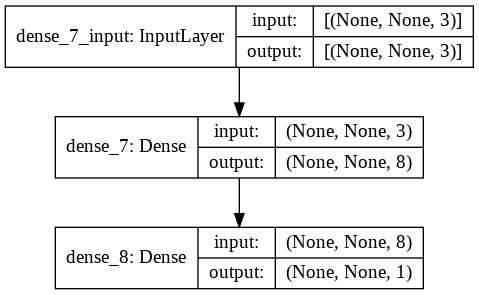

In [ ]:
#Visual of model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(loss="mse", optimizer="rmsprop")

In [ ]:
#Train model
history = model.fit(X, y, epochs=550)

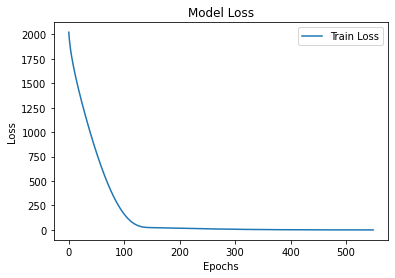

In [ ]:
#Plot the training loss using information from the above model training step
import matplotlib.pyplot as plt

loss = history.history['loss']

plt.plot(history.history['loss'], label='Train Loss')

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc='upper right')
plt.show();

**By adding layers, the number of epochs required to minimize the loss DECREASES.**

In [ ]:
#Demonstrate Prediction using model.predict
x_input = np.array([70, 80, 90]) # predict the output for this input
x_input = x_input.reshape((1, n_steps))
y_output = model.predict(x_input)
print("X=%s, Predicted=%s" % (x_input, y_output))

X=[[70 80 90]], Predicted=[[100.99588]]


**Problem 1b:** What happens when you try to predict the next number for the following test sequence: 1^2, 2^2, 3^2? Does the model you developed in Part 1a work here?  Explain.

In [ ]:
# Your code here: Demonstrate Prediction using model.predict
x_input = np.array([1, 4, 9]) # predict the output for this input
x_input = x_input.reshape((1, n_steps))

y_output = model.predict(x_input)
print("X=%s, Predicted=%s" % (x_input, y_output))


X=[[1 4 9]], Predicted=[[13.181818]]


**This model does not accurately predict the test sequence [1^2, 2^2, 3^2]. This is because the sequence is non-linear, and the model has been trained on data that is linearly separable.**

**Problem 2a:** Repeat Problem #1, but this time train your model to predict the next number in the sequence of squares (n^2, where n = 1, 2, 3, ...).  Also, this time use Keras Functional API to build your model.

In [ ]:
# Define input sequence
raw_seq = [1, 4, 9, 16, 25, 36, 49, 64, 81]
# choose a number of time steps
n_steps = 3
# split into samples
#def split_sequence(sequence, n_steps)
#split_sequence(sequence, n_steps)
X, y = split_sequence(raw_seq, n_steps)
# summarize the data
for i in range(len(X)):
	print(X[i], y[i])

[1 4 9] 16
[ 4  9 16] 25
[ 9 16 25] 36
[16 25 36] 49
[25 36 49] 64
[36 49 64] 81


In [ ]:
#Some Imports to help you as a start; feel free to add more as needed
from tensorflow import keras
from keras.layers import Activation, Dense
from keras import optimizers, Input, Model
from keras.regularizers import l2
from keras.regularizers import l1

In [ ]:
# Your code here: define the model
layer1 = keras.layers.Input(shape=[3,])
hidden1 = keras.layers.Dense(256, activation="swish", kernel_regularizer=l2(0.))(layer1)
hidden2 = keras.layers.Dense(128, activation="swish", kernel_regularizer=l2(0.))(hidden1)
hidden3 = keras.layers.Dense(128, activation="swish", kernel_regularizer=l2(0.))(hidden2)
output = keras.layers.Dense(1, activation="swish", kernel_regularizer=l2(0.))(hidden3)
model = keras.Model(inputs=layer1, outputs=output )

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3)]               0         
_________________________________________________________________
dense (Dense)                (None, 256)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 50,561
Trainable params: 50,561
Non-trainable params: 0
_________________________________________________________________


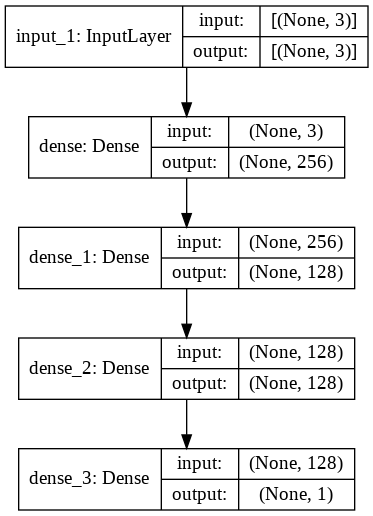

In [ ]:
#Model visualization
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Your code here: train the model via the Keras fit function
model.compile(loss="mse", optimizer="adam",
              metrics=["accuracy"])
history = model.fit(X, y, epochs=100)

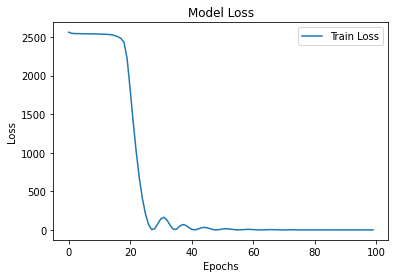

In [ ]:
#Plot the training loss using information from the above model training step
import matplotlib.pyplot as plt

loss = history.history['loss']

plt.plot(history.history['loss'], label='Train Loss')

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc='upper right')
plt.show();

In [ ]:
# Your code here: Demonstrate Prediction using model.predict; feel free to show
# additional examples than the one already provided here
x_input = np.array([49, 64, 81]) # predict the output for this input
x_input = x_input.reshape((1, n_steps))
y_output = model.predict(x_input)
print("X=%s, Predicted=%s" % (x_input, y_output))


X=[[49 64 81]], Predicted=[[102.64433]]


**Problem 2b:** How many perceptrons (neurons) are there in the Multi-Layer Perceptron (MLP) model you defined in the problem 2a? How many weights? And how many learnable parameters? Please show your calculation and explain briefly.

**The model has 3 inputs, 3 hidden layers with 256, 128, and 128 neurons. 4 weights were used to simulate a logistic regression. 50,561 trainable parameters.**



**Problem 3:** Now we will analyze the Medical Expenditures Dataset (dataSheet2.csv). [Refer to https://www.frontiersin.org/articles/10.3389/fdata.2020.00004/full for more details on dataset and problem.]  This dataset contains average daily expenditures on a medicine.  We will break up this dataset into train and test sets and design a Multi-Layer Perceptron to forecast average daily medical expenditures for a future time-step after training on a number of time-steps from the past.

In [ ]:
#MOUNTING GOOGLE DRIVE WHERE DATA IS STORED
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
#GET THE DATA (Remember to change the path to the location of your saved file!)
import pandas as pd
data = pd.read_csv("/gdrive/My Drive/dataSheet2.csv")
data.head()

,Date,Average Daily Expenditure on Medicine B in Dollars
0,1/2/2011,114.874671
1,1/3/2011,112.041149
2,1/4/2011,167.311618
3,1/5/2011,241.058332
4,1/6/2011,124.520457


In [ ]:
import numpy as np
np.shape(data)

(1565, 2)

<function matplotlib.pyplot.show>

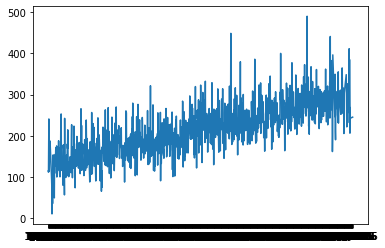

In [ ]:
#Plot data to observe trend
import matplotlib.pyplot as plt
plt.plot(data['Date'], data['Average Daily Expenditure on Medicine B in Dollars'])
plt.show

<function matplotlib.pyplot.show>

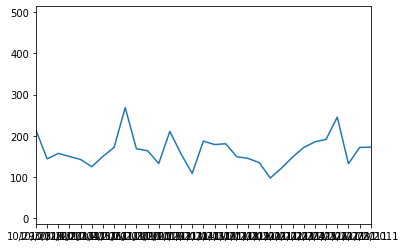

In [ ]:
#Plot different time lags-- 30 days 
plt.plot(data['Date'], data['Average Daily Expenditure on Medicine B in Dollars'])
plt.xlim([300,330])
plt.show

<function matplotlib.pyplot.show>

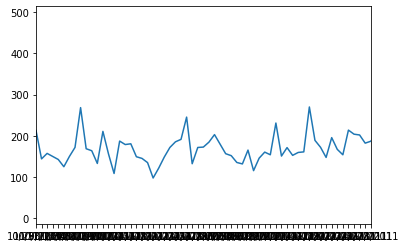

In [ ]:
#Plot different time lags-- 60 days
plt.plot(data['Date'], data['Average Daily Expenditure on Medicine B in Dollars'])
plt.xlim([300,360])
plt.show

<function matplotlib.pyplot.show>

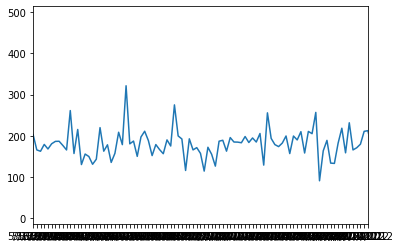

In [ ]:
#Plot different time lags-- Quarter
plt.plot(data['Date'], data['Average Daily Expenditure on Medicine B in Dollars'])
plt.xlim([500,590])
plt.show

In [ ]:
import numpy as np
#JUST GET THE MEDICINE EXPENDITURE VALUES
data1 = data["Average Daily Expenditure on Medicine B in Dollars"]
data1Arr = np.array(data1)
print(data1.shape)
print(data1Arr.shape)

(1565,)
(1565,)


In [ ]:
#DIFFERENT WAY OF SPLITTING DATA INTO INPUT/OUTPUT SEQUENCES
def convert2matrix(data_arr, look_back):
 X, Y =[], []
 for i in range(len(data_arr)-look_back):
  d=i+look_back  
  X.append(data_arr[i:d])
  Y.append(data_arr[d])
 return np.array(X), np.array(Y)

In [ ]:
# #Split data set into testing dataset and train dataset-- look_back = 7
# train_size = int(len(data1Arr) * 0.8) #80% training, 20% testing
# train = data1Arr[0:train_size]
# test = data1Arr[train_size:len(data1Arr)]
# print(train.shape)
# print(test.shape)
# # setup look_back window 
# look_back = 7 #weekly 
# #convert dataset into right shape in order to input into the DNN
# trainX, trainY = convert2matrix(train, look_back)
# testX, testY = convert2matrix(test, look_back)

# #Print a few of the samples to check format
# for i in range(5):
#   print(trainX[i], trainY[i])

# #look_back = monthly (30), quarterly(90), biweekly(14)

In [ ]:
#Split data set into testing dataset and train dataset-- look_back = 14
train_size = int(len(data1Arr) * 0.8) #80% training, 20% testing
train = data1Arr[0:train_size]
test = data1Arr[train_size:len(data1Arr)]
print(train.shape)
print(test.shape)
# setup look_back window 
look_back = 14 #biweekly 
#convert dataset into right shape in order to input into the DNN
trainX, trainY = convert2matrix(train, look_back)
testX, testY = convert2matrix(test, look_back)

#Print a few of the samples to check format
for i in range(5):
  print(trainX[i], trainY[i])

(1252,)
(313,)
[114.8746706 112.0411489 167.3116175 241.0583317 124.5204571 113.8333722
 149.2555453 159.0992442 187.9188007 138.774122  176.4914938 165.7128948
 154.9342959 144.1556969] 133.3770979
[112.0411489 167.3116175 241.0583317 124.5204571 113.8333722 149.2555453
 159.0992442 187.9188007 138.774122  176.4914938 165.7128948 154.9342959
 144.1556969 133.3770979] 122.598499
[167.3116175 241.0583317 124.5204571 113.8333722 149.2555453 159.0992442
 187.9188007 138.774122  176.4914938 165.7128948 154.9342959 144.1556969
 133.3770979 122.598499 ] 111.8199
[241.0583317 124.5204571 113.8333722 149.2555453 159.0992442 187.9188007
 138.774122  176.4914938 165.7128948 154.9342959 144.1556969 133.3770979
 122.598499  111.8199   ] 94.88492505
[124.5204571  113.8333722  149.2555453  159.0992442  187.9188007
 138.774122   176.4914938  165.7128948  154.9342959  144.1556969
 133.3770979  122.598499   111.8199      94.88492505] 77.94995004


**From testing look-back time-steps, 14 day increments appeared to lower test & train RMSE the most. All others are therefore greyed out.**

In [ ]:
# #Split data set into testing dataset and train dataset-- look_back = 30
# train_size = int(len(data1Arr) * 0.8) #80% training, 20% testing
# train = data1Arr[0:train_size]
# test = data1Arr[train_size:len(data1Arr)]
# print(train.shape)
# print(test.shape)
# # setup look_back window 
# look_back = 30 #monthly 
# #convert dataset into right shape in order to input into the DNN
# trainX, trainY = convert2matrix(train, look_back)
# testX, testY = convert2matrix(test, look_back)

# #Print a few of the samples to check format
# for i in range(5):
#   print(trainX[i], trainY[i])

In [ ]:
# #Split data set into testing dataset and train dataset-- look_back = 90
# train_size = int(len(data1Arr) * 0.8) #80% training, 20% testing
# train = data1Arr[0:train_size]
# test = data1Arr[train_size:len(data1Arr)]
# print(train.shape)
# print(test.shape)
# # setup look_back window 
# look_back = 90 #quarterly 
# #convert dataset into right shape in order to input into the DNN
# trainX, trainY = convert2matrix(train, look_back)
# testX, testY = convert2matrix(test, look_back)

# #Print a few of the samples to check format
# for i in range(5):
#   print(trainX[i], trainY[i])

In [ ]:
#Checking that data shapes make sense
np.shape(trainX)

(1245, 7)

In [ ]:
np.shape(trainY)

(1245,)

In [ ]:
np.shape(testX)

(306, 7)

In [ ]:
np.shape(testY)

(306,)

**YOUR TASK:** Design an MLP taking into account what you have learned from Problems #1 and #2 that achieves as low RMSE (Root Mean Square Error) as possible.  Consider the impact of number of look-back time-steps.  Experiment with and comment on results of changing 3 of the following parameters, providing reasons for your observations.

1.   Number of hidden layers
2.   Number of neurons per layer
3.   Activation Function
4.   Number of epochs
5.   Batch size
6.   Optimizer/Learning Rate

You will be graded on your analysis of these factors, not on the accuracy (RMSE) you achieve.  Show plots of training/test loss for your 3 chosen experiments and a plot of actual vs. prediction for your best model.  Does the same MLP that you designed for Problems #1 and #2 work well for Problem #3?

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras import optimizers, Input, Model
from keras.regularizers import l2
from keras.regularizers import l1

# **Model from Problem 1**

In [ ]:
#Model from PROBLEM 1-- Perceptron, Sequential
model = keras.models.Sequential()
model.add(keras.layers.Dense(8, activation="relu", input_shape=[14,]))
model.add(keras.layers.Dense(1, activation="relu"))

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_154 (Dense)            (None, 8)                 120       
_________________________________________________________________
dense_155 (Dense)            (None, 1)                 9         
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="mse", optimizer="rmsprop")

In [ ]:
history = model.fit(trainX, trainY, epochs=500, validation_split=0.2)

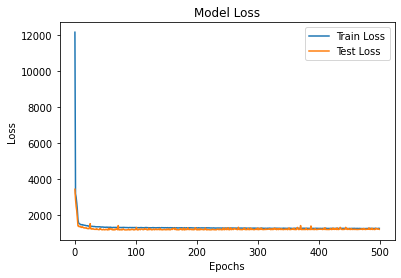

In [ ]:
#PLOT THE TRAINING LOSS
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc='upper right')
plt.show()

In [ ]:
#MODEL EVALUATION via RMSE
train_score = model.evaluate(trainX, trainY, verbose=0)
print('Train Root Mean Squared Error(RMSE): ', train_score)
test_score = model.evaluate(testX, testY, verbose=0)
print('Test Root Mean Squared Error(RMSE): ', test_score)

Train Root Mean Squared Error(RMSE):  1235.6380615234375
Test Root Mean Squared Error(RMSE):  1710.6234130859375


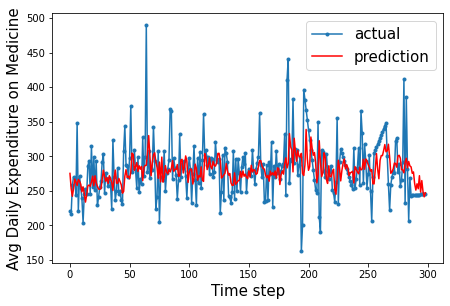

In [ ]:
# Demonstrate Prediction and Create Plot to Compare Prediction to Actual
short = 313 #how much of the test sequence to plot (currently: all of it)
test_predict = model.predict(testX)

def prediction_plot(testY, test_predict):
  len_prediction=[x for x in range(len(testY[:short]))]
  plt.plot(len_prediction, testY[:short], marker='.', label="actual")
  plt.plot(len_prediction, test_predict[:short], 'r', label="prediction")
  plt.tight_layout()
  plt.subplots_adjust(left=0.07)
  plt.ylabel('Avg Daily Expenditure on Medicine', size=15)
  plt.xlabel('Time step', size=15)
  plt.legend(fontsize=15)
  plt.show();

prediction_plot(testY, test_predict)

# **Model from Problem 2**

In [ ]:
#Model from PROBLEM 2-- MLP
layer1 = keras.layers.Input(shape=[14,])
hidden1 = keras.layers.Dense(256, activation="swish", kernel_regularizer=l2(0.))(layer1)
hidden2 = keras.layers.Dense(128, activation="swish", kernel_regularizer=l2(0.))(hidden1)
hidden3 = keras.layers.Dense(128, activation="swish", kernel_regularizer=l2(0.))(hidden2)
output = keras.layers.Dense(1, activation="swish", kernel_regularizer=l2(0.))(hidden3)
model = keras.Model(inputs=layer1, outputs=output )

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 14)]              0         
_________________________________________________________________
dense (Dense)                (None, 256)               3840      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 53,377
Trainable params: 53,377
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Train the model via the Keras fit function
model.compile(loss="mse", optimizer="adam",
              metrics=["accuracy"])
history = model.fit(trainX, trainY, epochs=100, validation_split=0.2)

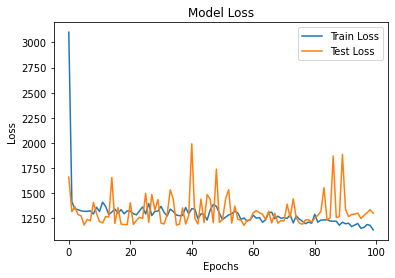

In [ ]:
#PLOT THE TRAINING LOSS
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc='upper right')
plt.show()

In [ ]:
#MODEL EVALUATION via RMSE
train_score = model.evaluate(trainX, trainY, verbose=0)
print('Train Root Mean Squared Error(RMSE): ', train_score)
test_score = model.evaluate(testX, testY, verbose=0)
print('Test Root Mean Squared Error(RMSE): ', test_score)

Train Root Mean Squared Error(RMSE):  [1129.9097900390625, 0.0]
Test Root Mean Squared Error(RMSE):  [1859.9356689453125, 0.0]


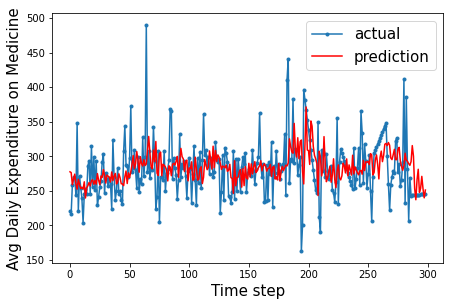

In [ ]:
# Demonstrate Prediction and Create Plot to Compare Prediction to Actual
short = 313 #how much of the test sequence to plot (currently: all of it)
test_predict = model.predict(testX)

def prediction_plot(testY, test_predict):
  len_prediction=[x for x in range(len(testY[:short]))]
  plt.plot(len_prediction, testY[:short], marker='.', label="actual")
  plt.plot(len_prediction, test_predict[:short], 'r', label="prediction")
  plt.tight_layout()
  plt.subplots_adjust(left=0.07)
  plt.ylabel('Avg Daily Expenditure on Medicine', size=15)
  plt.xlabel('Time step', size=15)
  plt.legend(fontsize=15)
  plt.show();

prediction_plot(testY, test_predict)

# **Experimental: Number of epochs, Number of hidden layers, Activation function**

In [ ]:
# YOUR CODE HERE: define model
import tensorflow as tf
from tensorflow.keras import initializers
initializer = tf.keras.initializers.HeUniform()

# #Initial Model:
# layer1 = keras.layers.Input(shape=[14,])
# hidden1 = keras.layers.Dense(128, activation="relu", kernel_regularizer=l1(0.))(layer1)
# hidden2 = keras.layers.Dense(64, activation="relu", kernel_regularizer=l1(0.))(hidden1)
# hidden3 = keras.layers.Dense(64, activation="relu", kernel_regularizer=l1(0.))(hidden2)
# #Add 2 more layers:
# #hidden4 = keras.layers.Dense(64, activation="relu", kernel_regularizer=l1(0.))(hidden3)
# #hidden5 = keras.layers.Dense(64, activation="relu", kernel_regularizer=l1(0.))(hidden4)
# output = keras.layers.Dense(1, activation="relu", kernel_regularizer=l1(0.))(hidden3)
# model = keras.Model(inputs=layer1, outputs=output )

#Change Activation function to Swish:
layer1 = keras.layers.Input(shape=[14,])
hidden1 = keras.layers.Dense(128, activation="swish", kernel_regularizer=l1(0.))(layer1)
hidden2 = keras.layers.Dense(64, activation="swish", kernel_regularizer=l1(0.))(hidden1)
hidden3 = keras.layers.Dense(64, activation="swish", kernel_regularizer=l1(0.))(hidden2)
output = keras.layers.Dense(1, activation="swish", kernel_regularizer=l1(0.))(hidden3)
model = keras.Model(inputs=layer1, outputs=output )

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 14)]              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1920      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 14,401
Trainable params: 14,401
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# YOUR CODE HERE: Train Model
model.compile(loss='mean_absolute_error', optimizer="adam", metrics=["accuracy"])
#Epochs for initial model:
history = model.fit(trainX, trainY, epochs=150, validation_split=0.2)
#Changed number of epochs to 300:
#history = model.fit(trainX, trainY, epochs=300, validation_split=0.2)

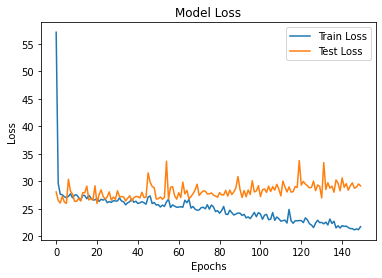

In [ ]:
#PLOT THE TRAINING LOSS
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc='upper right')
plt.show()

In [ ]:
#MODEL EVALUATION via RMSE
train_score = model.evaluate(trainX, trainY, verbose=0)
print('Train Root Mean Squared Error(RMSE): ', train_score)
test_score = model.evaluate(testX, testY, verbose=0)
print('Test Root Mean Squared Error(RMSE): ', test_score)

Train Root Mean Squared Error(RMSE):  [22.17965316772461, 0.0]
Test Root Mean Squared Error(RMSE):  [33.41248321533203, 0.0]


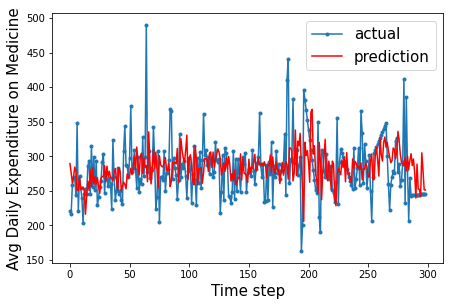

In [ ]:
# Demonstrate Prediction and Create Plot to Compare Prediction to Actual
short = 313 #how much of the test sequence to plot (currently: all of it)
test_predict = model.predict(testX)

def prediction_plot(testY, test_predict):
  len_prediction=[x for x in range(len(testY[:short]))]
  plt.plot(len_prediction, testY[:short], marker='.', label="actual")
  plt.plot(len_prediction, test_predict[:short], 'r', label="prediction")
  plt.tight_layout()
  plt.subplots_adjust(left=0.07)
  plt.ylabel('Avg Daily Expenditure on Medicine', size=15)
  plt.xlabel('Time step', size=15)
  plt.legend(fontsize=15)
  plt.show();

prediction_plot(testY, test_predict)

**Problem 4:** Now let's repeat Problem #3 using a non-DL model for comparison.  Use an ARIMA Model for time-series forecasting on the medicine expenditures dataset.  Your task is to experiment with the lag order (p), degree of differencing (d), and order of the moving average (q).  Discuss the impact of these factors on your final prediction error.  How does this model compare with your MLP model from Problem #3?  Which one is better?  Why?  Why are they both still not "good enough"?

In [ ]:
##Since I had difficulties with running the models back-to-back, I have to restart the runtime between each model. 
#I copied and pasted the import of the data and data organization steps to make this easier.

#GET THE DATA (Remember to change the path to the location of your saved file!)
import pandas as pd
data = pd.read_csv("/gdrive/My Drive/dataSheet2.csv")
data.head()

,Date,Average Daily Expenditure on Medicine B in Dollars
0,1/2/2011,114.874671
1,1/3/2011,112.041149
2,1/4/2011,167.311618
3,1/5/2011,241.058332
4,1/6/2011,124.520457


In [ ]:
import numpy as np
#JUST GET THE MEDICINE EXPENDITURE VALUES
data1 = data["Average Daily Expenditure on Medicine B in Dollars"]
data1Arr = np.array(data1)
print(data1.shape)
print(data1Arr.shape)

(1565,)
(1565,)


In [ ]:
#DIFFERENT WAY OF SPLITTING DATA INTO INPUT/OUTPUT SEQUENCES
def convert2matrix(data_arr, look_back):
 X, Y =[], []
 for i in range(len(data_arr)-look_back):
  d=i+look_back  
  X.append(data_arr[i:d])
  Y.append(data_arr[d])
 return np.array(X), np.array(Y)

In [ ]:
#Split data set into testing dataset and train dataset-- 14
train_size = int(len(data1Arr) * 0.8) #80% training, 20% testing
train = data1Arr[0:train_size]
test = data1Arr[train_size:len(data1Arr)]
print(train.shape)
print(test.shape)
# setup look_back window 
look_back = 14 #biweekly 
#convert dataset into right shape in order to input into the DNN
trainX, trainY = convert2matrix(train, look_back)
testX, testY = convert2matrix(test, look_back)

#Print a few of the samples to check format
for i in range(5):
  print(trainX[i], trainY[i])

(1252,)
(313,)
[114.8746706 112.0411489 167.3116175 241.0583317 124.5204571 113.8333722
 149.2555453 159.0992442 187.9188007 138.774122  176.4914938 165.7128948
 154.9342959 144.1556969] 133.3770979
[112.0411489 167.3116175 241.0583317 124.5204571 113.8333722 149.2555453
 159.0992442 187.9188007 138.774122  176.4914938 165.7128948 154.9342959
 144.1556969 133.3770979] 122.598499
[167.3116175 241.0583317 124.5204571 113.8333722 149.2555453 159.0992442
 187.9188007 138.774122  176.4914938 165.7128948 154.9342959 144.1556969
 133.3770979 122.598499 ] 111.8199
[241.0583317 124.5204571 113.8333722 149.2555453 159.0992442 187.9188007
 138.774122  176.4914938 165.7128948 154.9342959 144.1556969 133.3770979
 122.598499  111.8199   ] 94.88492505
[124.5204571  113.8333722  149.2555453  159.0992442  187.9188007
 138.774122   176.4914938  165.7128948  154.9342959  144.1556969
 133.3770979  122.598499   111.8199      94.88492505] 77.94995004


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

#ARIMA model training and prediction (NOTE: training may take ~10min)
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(3,1,1)) #<--- YOUR TASK HERE: modify p, d, q
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	#print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


Test MSE: 1600.211


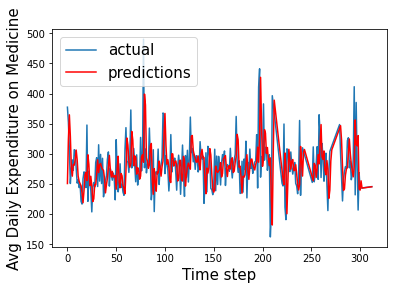

In [ ]:
from matplotlib import pyplot
# plotting actual vs. ARIMA prediction
pyplot.plot(test, label='actual')
pyplot.plot(predictions, color='red', label='predictions')
pyplot.ylabel('Avg Daily Expenditure on Medicine', size=15)
pyplot.xlabel('Time step', size=15)
pyplot.legend(fontsize=15)
pyplot.show()